## Step 1: Import Python Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

## Step 2: Reading Dataset

In [2]:
df = pd.read_csv("ObesityData.csv")

In [3]:
df.shape

(2111, 17)

In [4]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [5]:
df.tail()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III
2110,Female,23.664709,1.738836,133.472641,yes,yes,3.0,3.0,Sometimes,no,2.863513,no,1.026452,0.714137,Sometimes,Public_Transportation,Obesity_Type_III


In [6]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

## Step 2.1: Check for Duplication

In [8]:
df.nunique()

Gender                               2
Age                               1402
Height                            1574
Weight                            1525
family_history_with_overweight       2
FAVC                                 2
FCVC                               810
NCP                                635
CAEC                                 4
SMOKE                                2
CH2O                              1268
SCC                                  2
FAF                               1190
TUE                               1129
CALC                                 4
MTRANS                               5
NObeyesdad                           7
dtype: int64

## Step 2.2: Missing Values Check

In [9]:
df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [10]:
(df.isnull().sum()/(len(df)))*100

Gender                            0.0
Age                               0.0
Height                            0.0
Weight                            0.0
family_history_with_overweight    0.0
FAVC                              0.0
FCVC                              0.0
NCP                               0.0
CAEC                              0.0
SMOKE                             0.0
CH2O                              0.0
SCC                               0.0
FAF                               0.0
TUE                               0.0
CALC                              0.0
MTRANS                            0.0
NObeyesdad                        0.0
dtype: float64

### Observations
No missing values are found in the dataset.

## Step 2.3: Rename columns for easy understanding

In [11]:
df.columns = ['Gender', 'Age', 'Height', 'Weight', 'Fam_Obese_History', 'High_Calorie_Intake', 'Veggie_Intake',
              'Num_Main_Meals', 'Other_Food', 'Smoke', 'Water_Intake', 'Check_Calories', 'Exercise', 'Sit_Time',
              'Alcohol_Intake', 'Transport', 'Obesity_Type']

In [12]:
df.head()

,Gender,Age,Height,Weight,Fam_Obese_History,High_Calorie_Intake,Veggie_Intake,Num_Main_Meals,Other_Food,Smoke,Water_Intake,Check_Calories,Exercise,Sit_Time,Alcohol_Intake,Transport,Obesity_Type
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               2111 non-null   object 
 1   Age                  2111 non-null   float64
 2   Height               2111 non-null   float64
 3   Weight               2111 non-null   float64
 4   Fam_Obese_History    2111 non-null   object 
 5   High_Calorie_Intake  2111 non-null   object 
 6   Veggie_Intake        2111 non-null   float64
 7   Num_Main_Meals       2111 non-null   float64
 8   Other_Food           2111 non-null   object 
 9   Smoke                2111 non-null   object 
 10  Water_Intake         2111 non-null   float64
 11  Check_Calories       2111 non-null   object 
 12  Exercise             2111 non-null   float64
 13  Sit_Time             2111 non-null   float64
 14  Alcohol_Intake       2111 non-null   object 
 15  Transport            2111 non-null   o

In [14]:
columns = ['Age', 'Veggie_Intake', 'Num_Main_Meals', 'Water_Intake',  'Exercise', 'Sit_Time']

# convert to int / nearest int value
for col in columns:
    #round to nearest whole number
    df[col] = round(df[col]).astype('int')

### Observations
The data contained continuous values in Age and few categorical featues. Hence, the rounding to nearest int values/whole numbers is performed on the data. 

In [15]:
columns_zero_check = ['Gender', 'Age', 'Height', 'Weight', 'Fam_Obese_History', 'High_Calorie_Intake', 
                      'Veggie_Intake', 'Num_Main_Meals', 'Other_Food', 'Smoke', 'Water_Intake', 'Check_Calories', 
                      'Exercise', 'Sit_Time', 'Alcohol_Intake', 'Transport', 'Obesity_Type']

#Checking for 0 entries
zero_entries = (df[columns_zero_check] == 0)

column_status = {}

for column in columns_zero_check:
    has_zeros = zero_entries[column].any()
    column_status[column] = has_zeros

#Printing the column names along with True/False values
for column, has_zeros in column_status.items():
    print(f"{column}: {has_zeros}")

Gender: False
Age: False
Height: False
Weight: False
Fam_Obese_History: False
High_Calorie_Intake: False
Veggie_Intake: False
Num_Main_Meals: False
Other_Food: False
Smoke: False
Water_Intake: False
Check_Calories: False
Exercise: True
Sit_Time: True
Alcohol_Intake: False
Transport: False
Obesity_Type: False


### Observations
The data is validated for 0 values. Only Exercise and Sit_Time features has 0 values, however, they are actually ordinal values. Hence, those are not imputed.

## Step 3: Exploratory Data Analysis

### Data distribution for continuous features

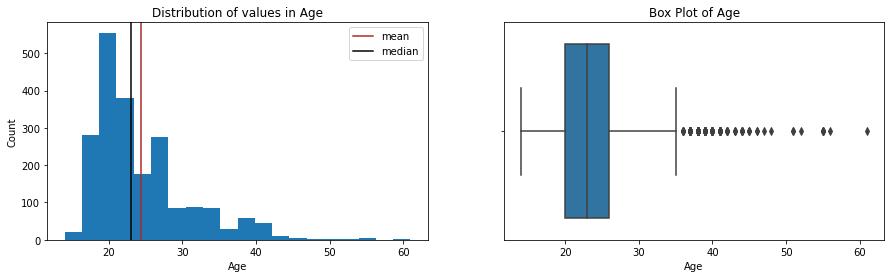

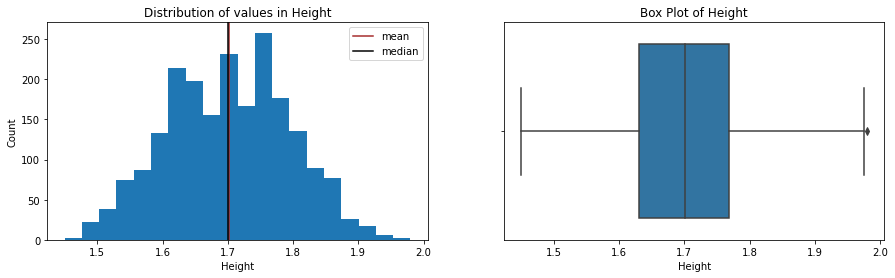

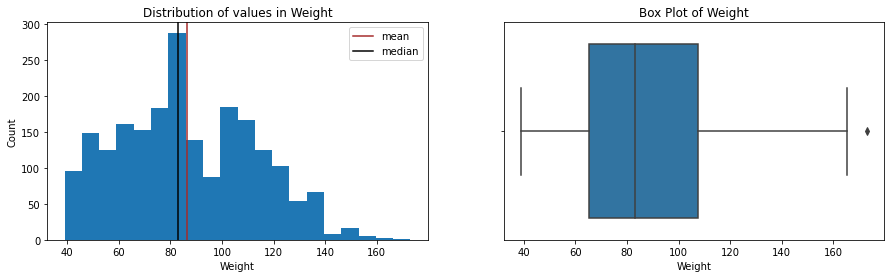

In [16]:
def plot_distribution(dataset, feature):
    plt.figure(figsize=(15, 4))
    plt.subplot(1, 2, 1)
    plt.hist(df[feature], bins = 20)
    plt.axvline(df[feature].mean(), color = "brown", label = "mean")
    plt.axvline(df[feature].median(), color = "black", label = "median")
    plt.xlabel(f"{feature}")
    plt.ylabel("Count")
    plt.legend()
    plt.title(f"Distribution of values in {feature}")
    
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[feature])
    plt.xlabel(feature)
    plt.title(f'Box Plot of {feature}')
    
    plt.show()
    
columns_to_plot = ['Age', 'Height', 'Weight']
for i in columns_to_plot:
    plot_distribution(df, i)

### Observations
Histogram:
The data distribution for Age, Height and Weight features are plotted using histogram. Mean and median are marked with red and black lines respectively. 
Mean values are as follows: Age = 24.312600, Height = 1.701677, Weight = 86.586058. 
Median values are: Age = 23, Height = 1.700499, Weight = 83. 

Outliers:
Outliers for Age, Height and Weight features are checked using Box Plots. There are outliers in the data, however, they are expected outliers since these values are common and seen in many individuals. Hence they are not removed.

# Univariate Bar Plots

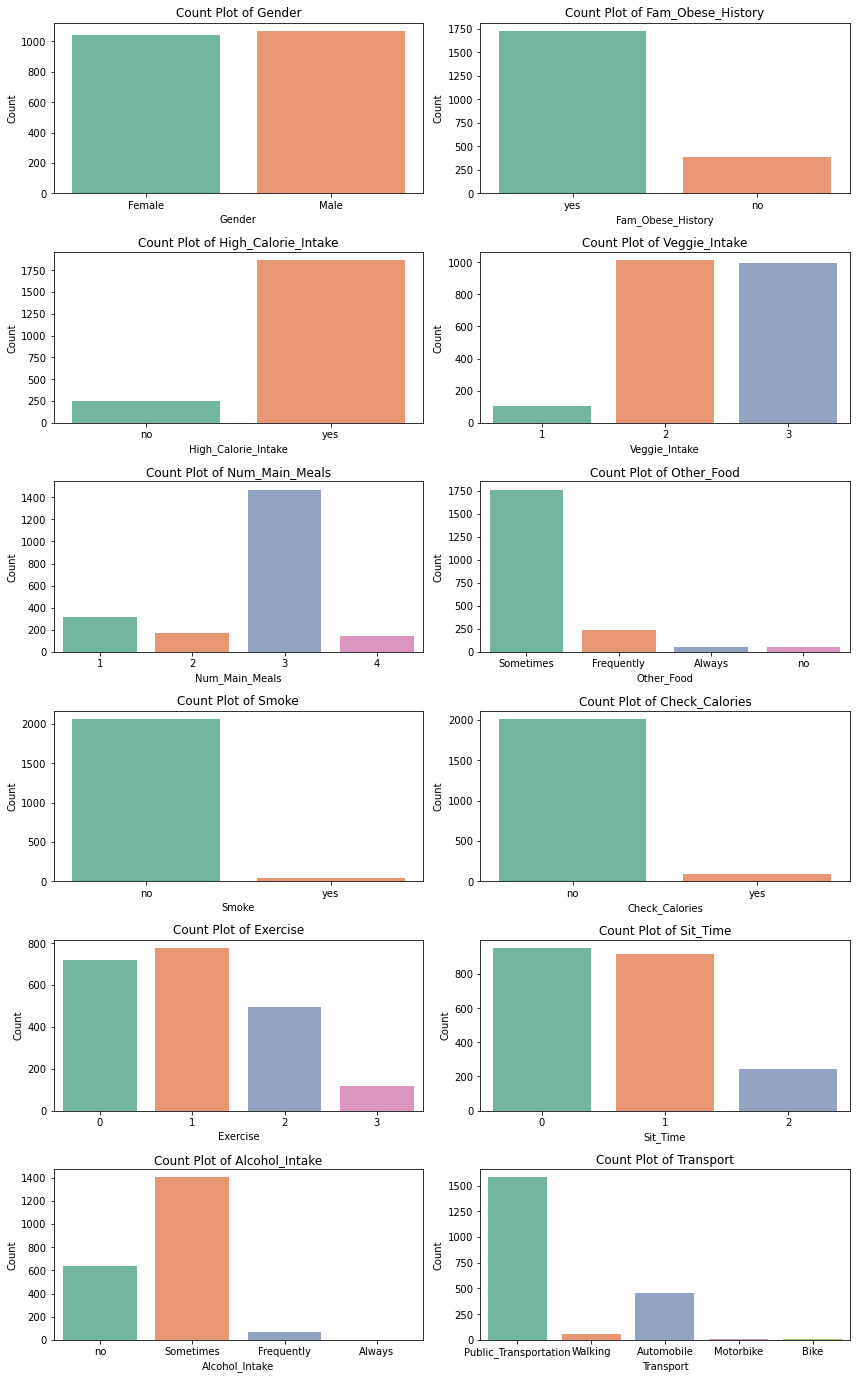

In [17]:
columns = ['Gender', 'Fam_Obese_History', 'High_Calorie_Intake', 'Veggie_Intake', 'Num_Main_Meals', 'Other_Food',
           'Smoke', 'Check_Calories', 'Exercise', 'Sit_Time', 'Alcohol_Intake', 'Transport']

plt.figure(figsize=(12, 22))

for i, col in enumerate(columns):
    plt.subplot(7, 2, i+1)
    sns.countplot(x=col, data=df, palette='Set2')
    plt.title(f'Count Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

<Figure size 576x360 with 0 Axes>

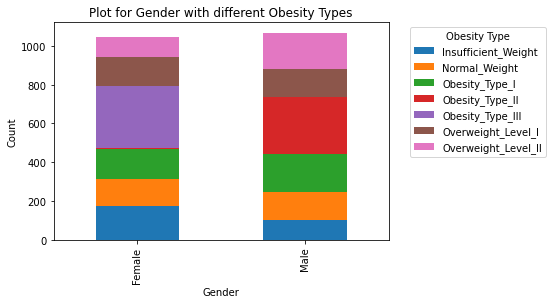

<Figure size 576x360 with 0 Axes>

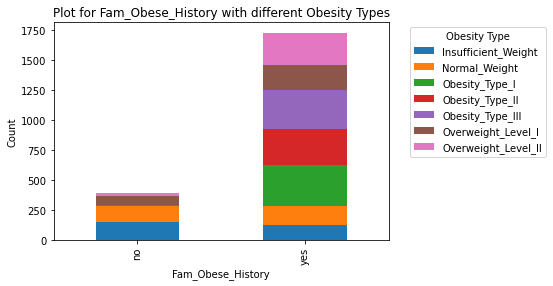

<Figure size 576x360 with 0 Axes>

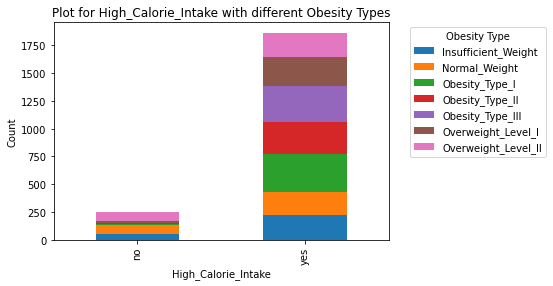

<Figure size 576x360 with 0 Axes>

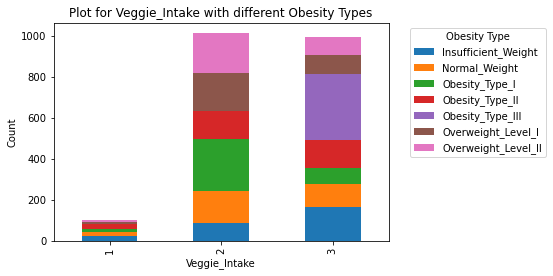

<Figure size 576x360 with 0 Axes>

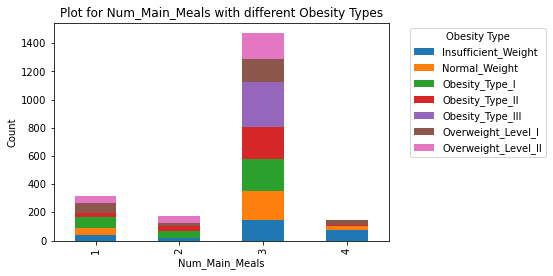

<Figure size 576x360 with 0 Axes>

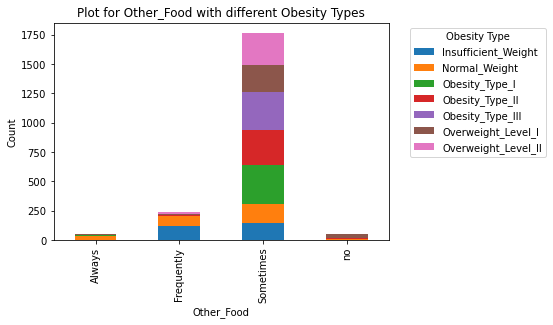

<Figure size 576x360 with 0 Axes>

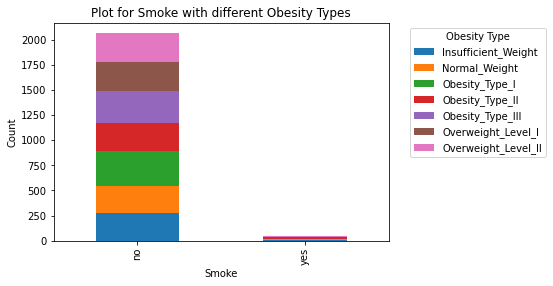

<Figure size 576x360 with 0 Axes>

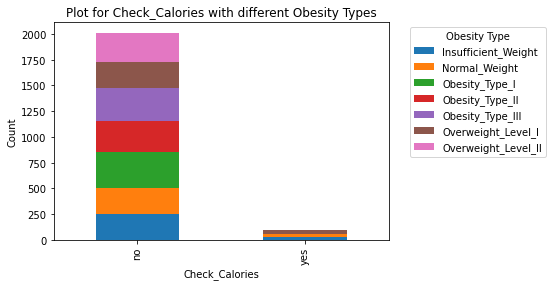

<Figure size 576x360 with 0 Axes>

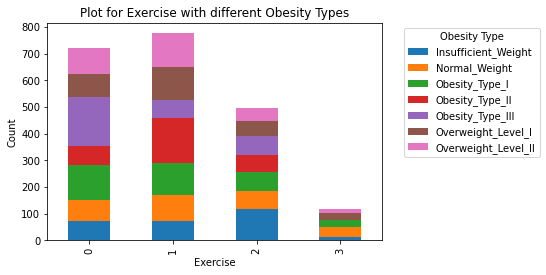

<Figure size 576x360 with 0 Axes>

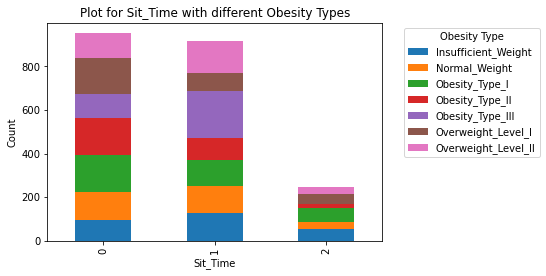

<Figure size 576x360 with 0 Axes>

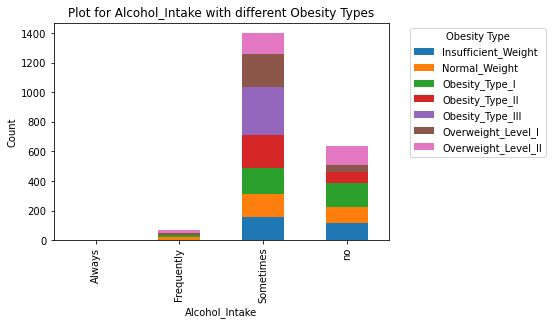

<Figure size 576x360 with 0 Axes>

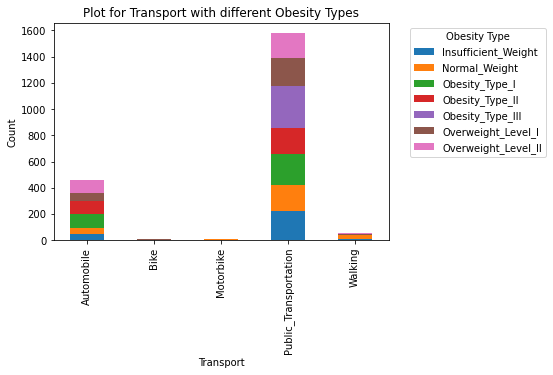

In [18]:
columns = ['Gender', 'Fam_Obese_History', 'High_Calorie_Intake', 'Veggie_Intake', 'Num_Main_Meals', 'Other_Food',
           'Smoke', 'Check_Calories', 'Exercise', 'Sit_Time', 'Alcohol_Intake', 'Transport']

for column in columns:
    plt.figure(figsize=(8, 5))
    df.groupby([column, 'Obesity_Type']).size().unstack().plot(kind='bar', stacked=True)
    plt.title(f'Plot for {column} with different Obesity Types')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.legend(title='Obesity Type', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

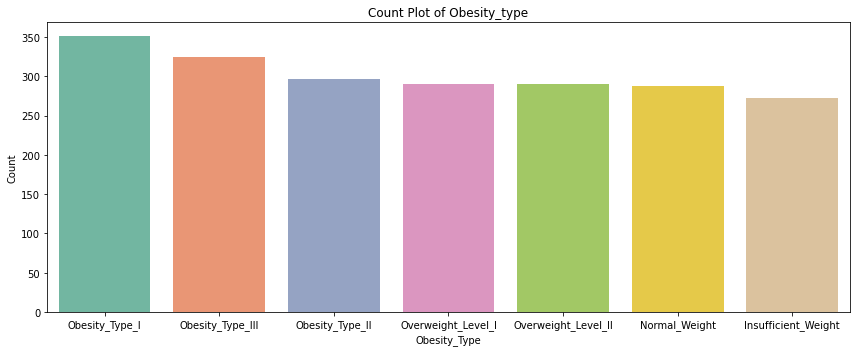

In [19]:
sort = df['Obesity_Type'].value_counts()

plt.figure(figsize=(12, 5))
sns.countplot(x='Obesity_Type', data=df, order=sort.index, palette='Set2')
plt.title(f'Count Plot of Obesity_type')
plt.xlabel('Obesity_Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

### Observations
These bar plots help to understand the counts for each value in the dataset for categorical and ordinal features. 

# Bivariate Bar Plots

In [20]:
def bivar_plot(df, lead_category, sup_category, order = None):   
    sns.countplot(x = lead_category, hue = sup_category, data = df, order = order, palette = "Reds")  
    plt.show()

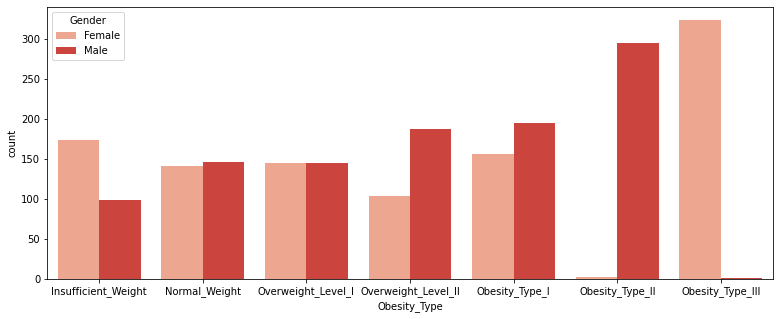

In [21]:
plt.figure(figsize = (13, 5))
bivar_plot(df, "Obesity_Type", "Gender", ["Insufficient_Weight", "Normal_Weight", 
                                          "Overweight_Level_I", "Overweight_Level_II", "Obesity_Type_I", 
                                          "Obesity_Type_II", "Obesity_Type_III"])

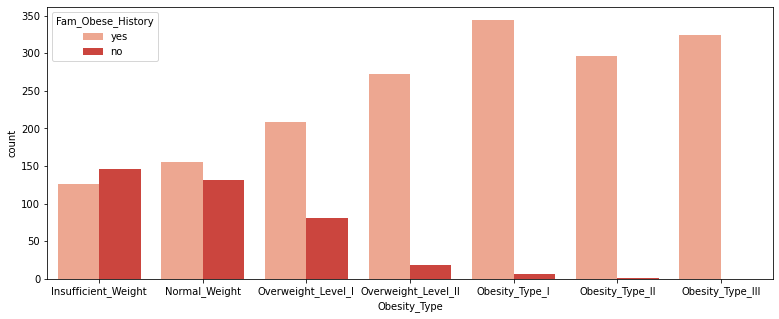

In [22]:
plt.figure(figsize = (13, 5))
bivar_plot(df, "Obesity_Type", "Fam_Obese_History", ["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", 
                                                     "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", 
                                                     "Obesity_Type_III"])

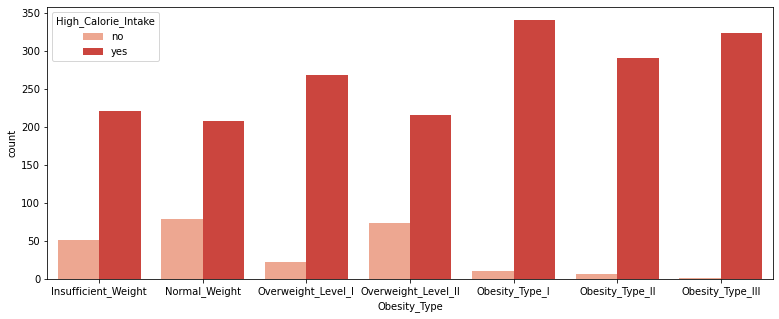

In [23]:
plt.figure(figsize = (13, 5))
bivar_plot(df, "Obesity_Type", "High_Calorie_Intake", ["Insufficient_Weight", "Normal_Weight", 
                                                       "Overweight_Level_I", "Overweight_Level_II", 
                                                       "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"]) 

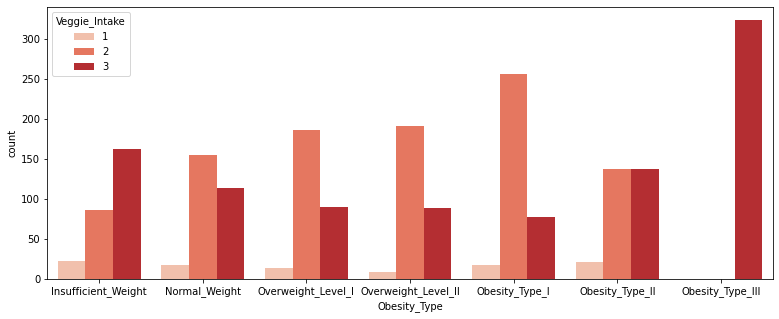

In [24]:
plt.figure(figsize = (13, 5))
bivar_plot(df, "Obesity_Type", "Veggie_Intake", ["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", 
                                                 "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", 
                                                 "Obesity_Type_III"]) 

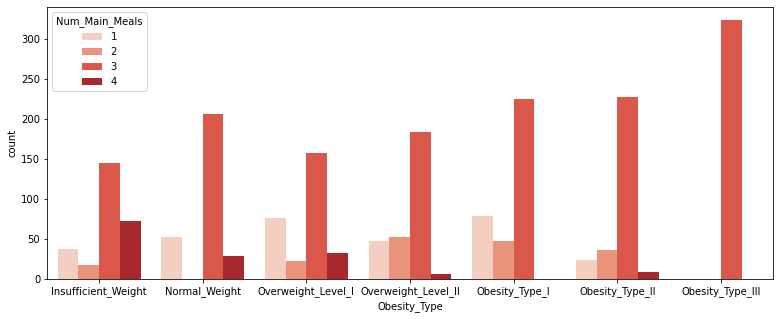

In [25]:
plt.figure(figsize = (13, 5))
bivar_plot(df, "Obesity_Type", "Num_Main_Meals", ["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", 
                                                  "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", 
                                                  "Obesity_Type_III"]) 

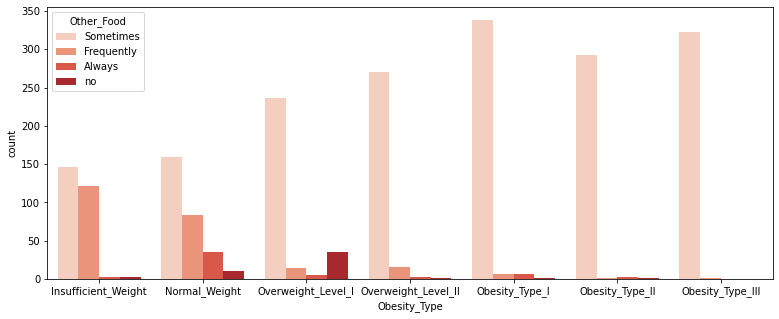

In [26]:
plt.figure(figsize = (13, 5))
bivar_plot(df, "Obesity_Type", "Other_Food", ["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", 
                                              "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", 
                                              "Obesity_Type_III"]) 

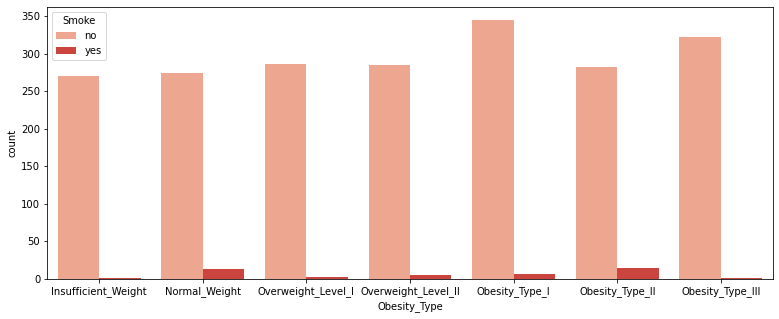

In [27]:
plt.figure(figsize = (13, 5))
bivar_plot(df, "Obesity_Type", "Smoke", ["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", 
                                         "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", 
                                         "Obesity_Type_III"]) 

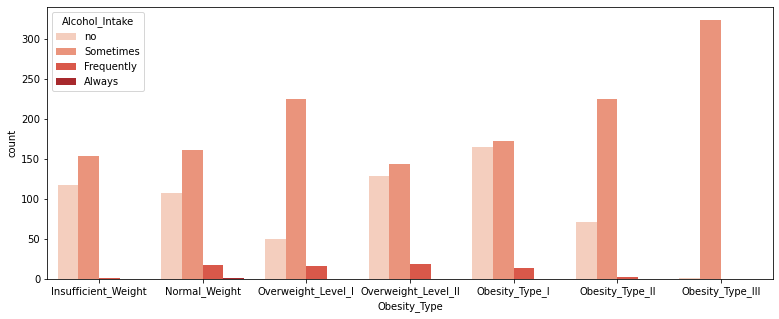

In [28]:
plt.figure(figsize = (13, 5))
bivar_plot(df, "Obesity_Type", "Alcohol_Intake", ["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", 
                                                  "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", 
                                                  "Obesity_Type_III"]) 

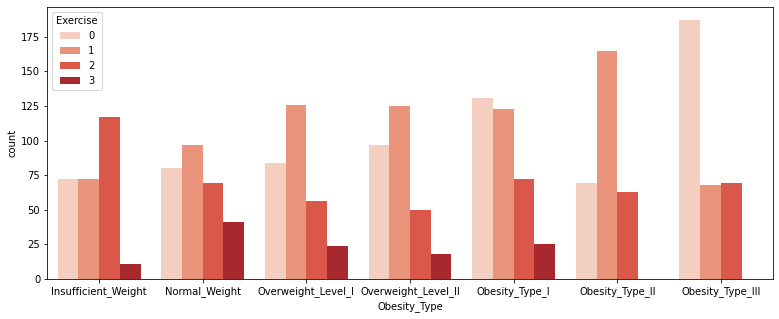

In [29]:
plt.figure(figsize = (13, 5))
bivar_plot(df, "Obesity_Type", "Exercise", ["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", 
                                            "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", 
                                            "Obesity_Type_III"]) 

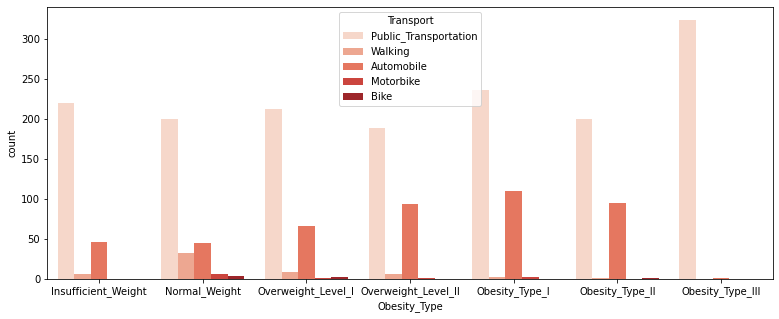

In [30]:
plt.figure(figsize = (13, 5))
bivar_plot(df, "Obesity_Type", "Transport", ["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", 
                                             "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", 
                                             "Obesity_Type_III"]) 

### Observations
These bar plots help to understand the counts for each value in the dataset for categorical and ordinal features with respect to the target feature

## Correlation Matrix

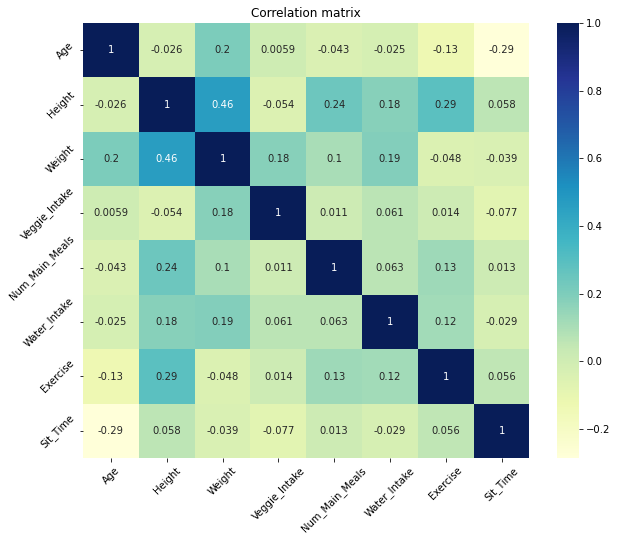

In [31]:
plt.figure(figsize = (10, 8))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")
plt.title("Correlation matrix")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

### Observations
Correlation matrix shows the correlation between features in the dataset.

## Plotting relation between Height and Weight features

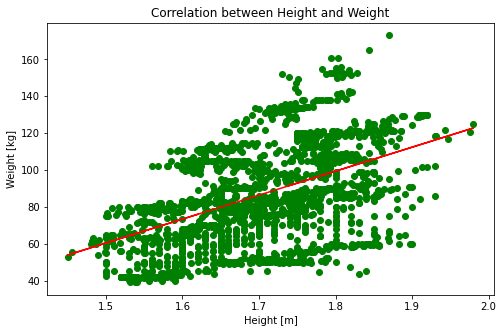

In [32]:
plt.figure(figsize = (8, 5))
plt.scatter(df["Height"], df["Weight"], c='g')
m, b = np.polyfit(df["Height"], df["Weight"], 1)
plt.plot(df["Height"], m * df["Height"] + b, color = "red")
plt.xlabel("Height [m]")
plt.ylabel("Weight [kg]")
plt.title("Correlation between Height and Weight")
plt.show()

### Observations
The above scatter plot shows the relationship between Height and Weight features. More information is discussed in the Technical Report.

## Step 4: Data Preprocessing

In [33]:
# Convert columns to int type
int_convert = ['Age', 'Veggie_Intake', 'Num_Main_Meals', 'Exercise', 'Sit_Time']

for i in int_convert:
    df[i] = df[i].astype('int64')

In [34]:
from sklearn.preprocessing import LabelEncoder

encode_cols = ['Gender', 'Fam_Obese_History', 'High_Calorie_Intake', 'Other_Food', 'Smoke', 'Check_Calories', 
               'Alcohol_Intake', 'Transport','Obesity_Type']

label_mappings = {}

# Apply label encoding to the specified columns
for col in encode_cols:
    encoder = LabelEncoder()
    df[col] = encoder.fit_transform(df[col])
    
    # Store the label mapping in the dictionary
    label_mappings[col] = {index: label for index, label in enumerate(encoder.classes_)}
    
# Print the label mappings
for col, mapping in label_mappings.items():
    print(f"Mapping for {col}: {mapping}\n")

Mapping for Gender: {0: 'Female', 1: 'Male'}

Mapping for Fam_Obese_History: {0: 'no', 1: 'yes'}

Mapping for High_Calorie_Intake: {0: 'no', 1: 'yes'}

Mapping for Other_Food: {0: 'Always', 1: 'Frequently', 2: 'Sometimes', 3: 'no'}

Mapping for Smoke: {0: 'no', 1: 'yes'}

Mapping for Check_Calories: {0: 'no', 1: 'yes'}

Mapping for Alcohol_Intake: {0: 'Always', 1: 'Frequently', 2: 'Sometimes', 3: 'no'}

Mapping for Transport: {0: 'Automobile', 1: 'Bike', 2: 'Motorbike', 3: 'Public_Transportation', 4: 'Walking'}

Mapping for Obesity_Type: {0: 'Insufficient_Weight', 1: 'Normal_Weight', 2: 'Obesity_Type_I', 3: 'Obesity_Type_II', 4: 'Obesity_Type_III', 5: 'Overweight_Level_I', 6: 'Overweight_Level_II'}



### Observations
Since the data contained categoricl features, they are mapped to ordinal values 

In [35]:
df.head()

,Gender,Age,Height,Weight,Fam_Obese_History,High_Calorie_Intake,Veggie_Intake,Num_Main_Meals,Other_Food,Smoke,Water_Intake,Check_Calories,Exercise,Sit_Time,Alcohol_Intake,Transport,Obesity_Type
0,0,21,1.62,64.0,1,0,2,3,2,0,2,0,0,1,3,3,1
1,0,21,1.52,56.0,1,0,3,3,2,1,3,1,3,0,2,3,1
2,1,23,1.80,77.0,1,0,2,3,2,0,2,0,2,1,1,3,1
3,1,27,1.80,87.0,0,0,3,3,2,0,2,0,2,0,1,4,5
4,1,22,1.78,89.8,0,0,2,1,2,0,2,0,0,0,2,3,6


# Box Plots

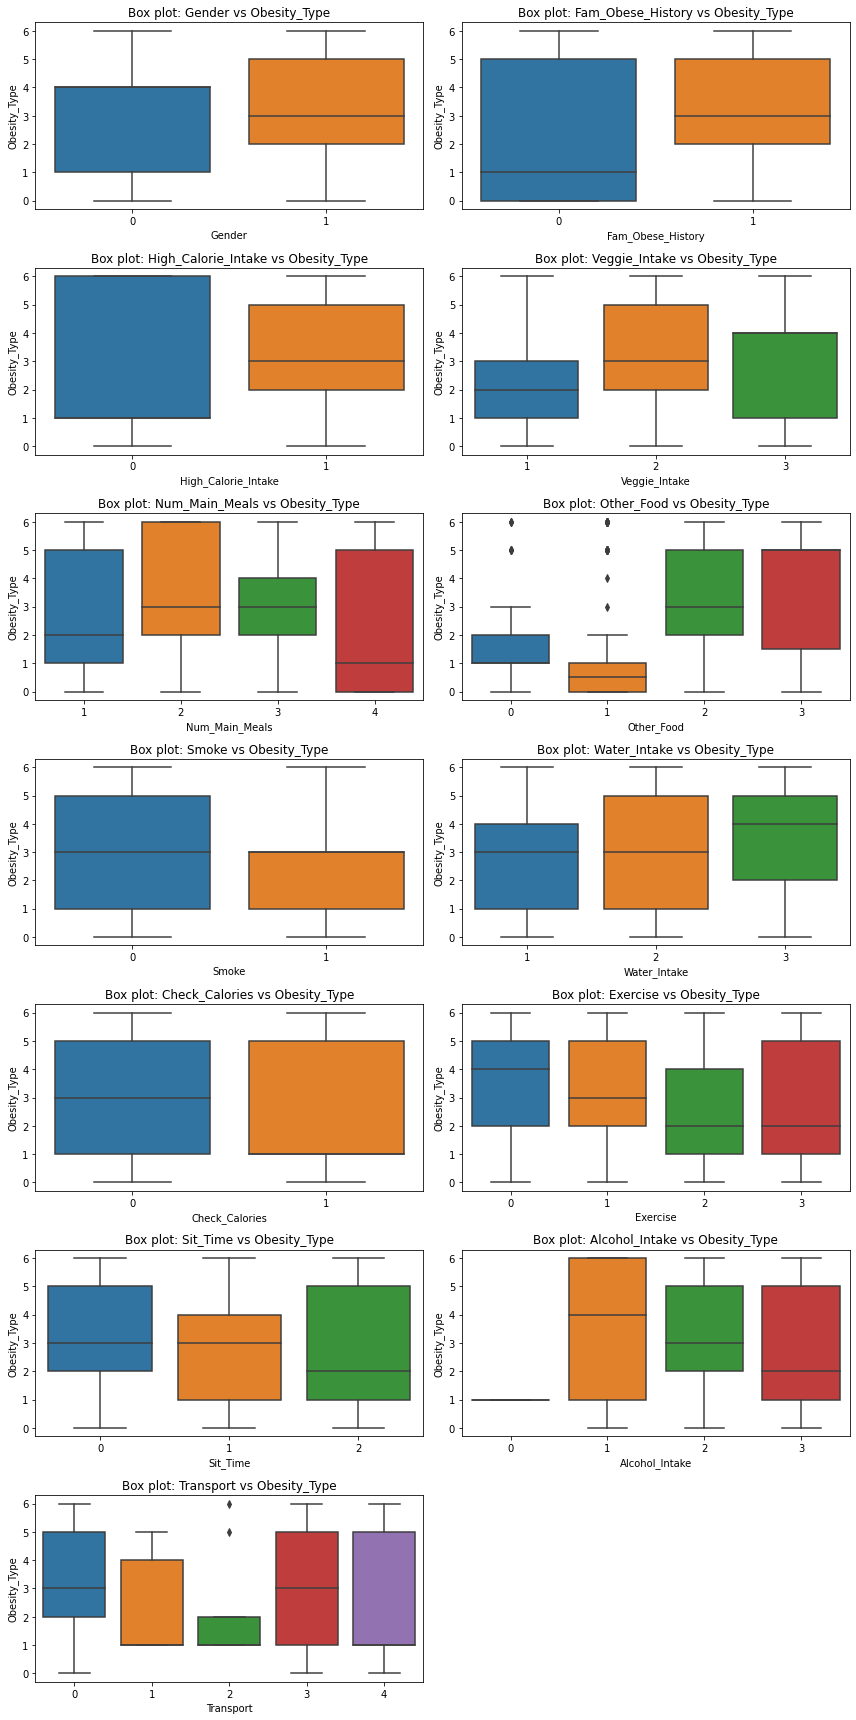

In [36]:
columns = ['Gender', 'Fam_Obese_History', 'High_Calorie_Intake', 'Veggie_Intake', 'Num_Main_Meals', 'Other_Food', 
           'Smoke', 'Water_Intake', 'Check_Calories', 'Exercise', 'Sit_Time', 'Alcohol_Intake', 'Transport']

plt.figure(figsize=(12, 24))
for i, column in enumerate(columns):
    plt.subplot(7, 2, i+1)  
    sns.boxplot(x=column, y='Obesity_Type', data=df)
    plt.title(f'Box plot: {column} vs Obesity_Type')

plt.tight_layout()
plt.show()

### Observations
The above box plots shows the outliers in the features with respect to the target feature.

# Checking outliers in the data

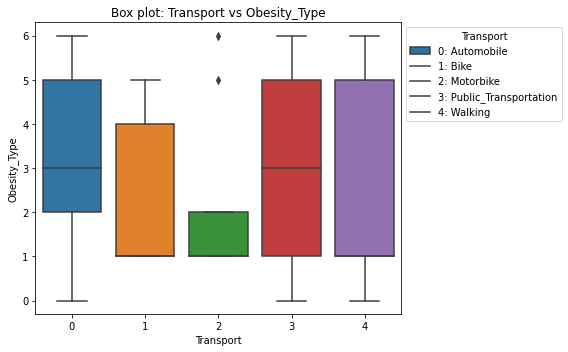

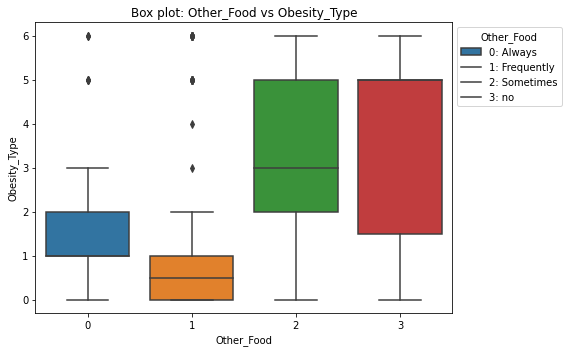

In [37]:
columns_to_plot = ['Transport', 'Other_Food']

# Create the mappings
mapping_transport = {0: 'Automobile', 1: 'Bike', 2: 'Motorbike', 3: 'Public_Transportation', 4: 'Walking'}
mapping_other_food = {0: 'Always', 1: 'Frequently', 2: 'Sometimes', 3: 'no'}

# Plot the "Transport" boxplot
plt.figure(figsize=(8, 5))
ax1 = sns.boxplot(x='Transport', y='Obesity_Type', data=df)
ax1.set_title('Box plot: Transport vs Obesity_Type')

# Create custom legend labels for "Transport"
legend_labels_transport = [f"{i}: {mapping_transport[i]}" for i in range(5)]
ax1.legend(title="Transport", labels=legend_labels_transport, loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

# Plot the "Other_food" boxplot
plt.figure(figsize=(8, 5))
ax2 = sns.boxplot(x='Other_Food', y='Obesity_Type', data=df)
ax2.set_title('Box plot: Other_Food vs Obesity_Type')

# Create custom legend labels for "Other_food"
legend_labels_other_food = [f"{i}: {mapping_other_food[i]}" for i in range(4)]
ax2.legend(title="Other_Food", labels=legend_labels_other_food, loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

# Outlier check

In [38]:
outlier_data = []

for col in df.columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = len(df[(df[col] < lower_bound) | (df[col] > upper_bound)])
    
    outlier_data.append({'Column': col, 'Q1': Q1, 'Q3': Q3, 'IQR': IQR, 'Lower Bound': lower_bound, 
                         'Upper Bound': upper_bound, 'Count': outliers})

check_outliers = pd.concat([pd.DataFrame([data]) for data in outlier_data], ignore_index=True)
print(check_outliers)

                 Column         Q1          Q3        IQR  Lower Bound  \
0                Gender   0.000000    1.000000   1.000000    -1.500000   
1                   Age  20.000000   26.000000   6.000000    11.000000   
2                Height   1.630000    1.768464   0.138464     1.422304   
3                Weight  65.473343  107.430682  41.957339     2.537334   
4     Fam_Obese_History   1.000000    1.000000   0.000000     1.000000   
5   High_Calorie_Intake   1.000000    1.000000   0.000000     1.000000   
6         Veggie_Intake   2.000000    3.000000   1.000000     0.500000   
7        Num_Main_Meals   3.000000    3.000000   0.000000     3.000000   
8            Other_Food   2.000000    2.000000   0.000000     2.000000   
9                 Smoke   0.000000    0.000000   0.000000     0.000000   
10         Water_Intake   2.000000    2.000000   0.000000     2.000000   
11       Check_Calories   0.000000    0.000000   0.000000     0.000000   
12             Exercise   0.000000    

# Scatter Plots

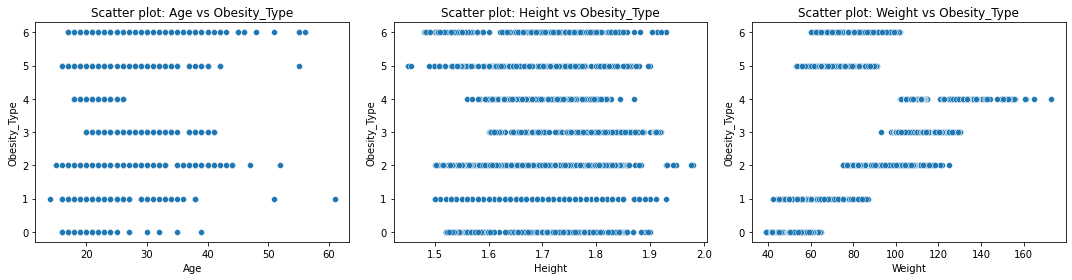

In [39]:
cols_to_plot = ['Age', 'Height', 'Weight']

plt.figure(figsize=(15, 4))
for i, column in enumerate(cols_to_plot):
    plt.subplot(1, 3, i+1)  
    sns.scatterplot(data=df, x=column, y='Obesity_Type')
    plt.title(f'Scatter plot: {column} vs Obesity_Type')

plt.tight_layout()
plt.show()

### Observations
The above scatter plots shows the data distribution for Age, Height and Weight with respect to the target feature.

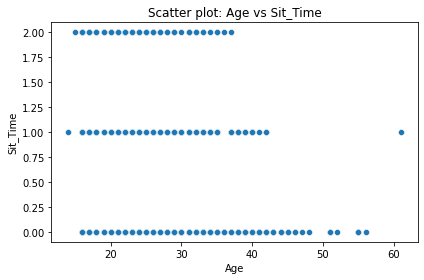

In [40]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='Age', y='Sit_Time')
plt.title(f'Scatter plot: Age vs Sit_Time')
plt.tight_layout()
plt.show()

### Observations
The above scatter plot shows the data distribution for Age with respect to the Sit_Time feature.

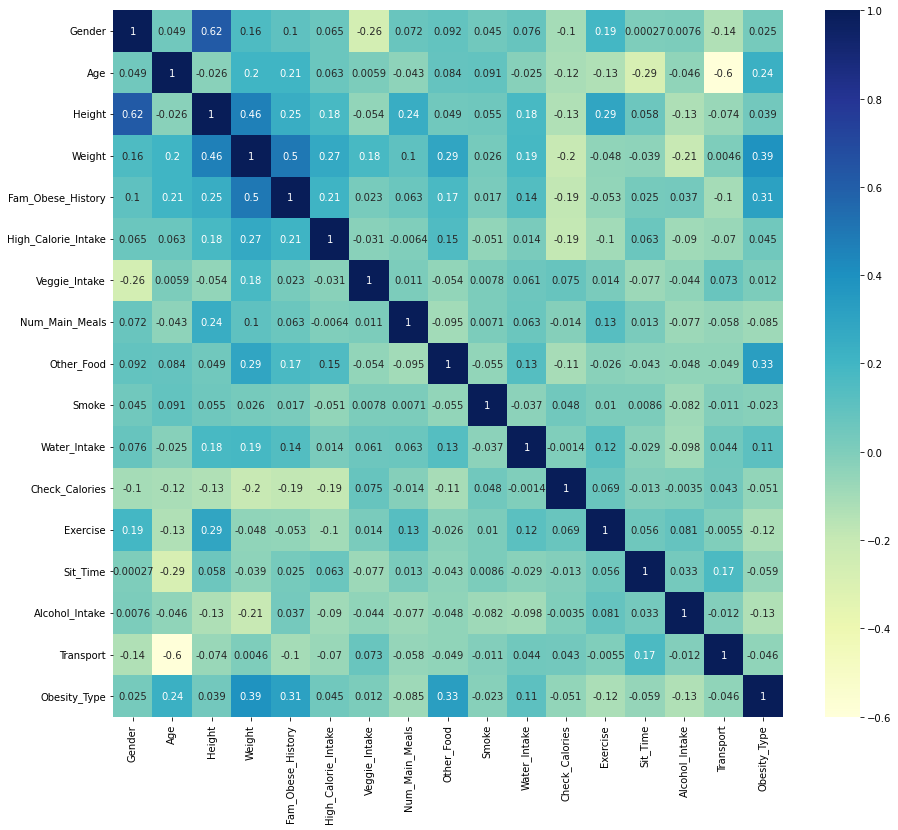

In [41]:
plt.figure(figsize = (15, 13))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")
plt.show()

### Observations
Correlation matrix for all the features in the dataset.

# Modeling

In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import classification_report, auc, ConfusionMatrixDisplay, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import label_binarize, StandardScaler
from itertools import cycle
from sklearn.multiclass import OneVsRestClassifier
from sklearn.cluster import KMeans
from xgboost import XGBClassifier
import xgboost as xgb

In [43]:
df_model = pd.read_csv("ObesityData.csv")

In [44]:
df_model.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [45]:
df_model.columns = ['Gender', 'Age', 'Height', 'Weight', 'Fam_Obese_History', 'High_Calorie_Intake', 'Veggie_Intake',
              'Num_Main_Meals', 'Other_Food', 'Smoke', 'Water_Intake', 'Check_Calories', 'Exercise', 'Sit_Time',
              'Alcohol_Intake', 'Transport', 'Obesity_Type']

In [46]:
columns = ['Age', 'Veggie_Intake', 'Num_Main_Meals', 'Water_Intake',  'Exercise', 'Sit_Time']

# convert to int / nearest int value
for col in columns:
    #round to nearest whole number
    df_model[col] = round(df_model[col]).astype('int')

In [47]:
df_model.head()

,Gender,Age,Height,Weight,Fam_Obese_History,High_Calorie_Intake,Veggie_Intake,Num_Main_Meals,Other_Food,Smoke,Water_Intake,Check_Calories,Exercise,Sit_Time,Alcohol_Intake,Transport,Obesity_Type
0,Female,21,1.62,64.0,yes,no,2,3,Sometimes,no,2,no,0,1,no,Public_Transportation,Normal_Weight
1,Female,21,1.52,56.0,yes,no,3,3,Sometimes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23,1.80,77.0,yes,no,2,3,Sometimes,no,2,no,2,1,Frequently,Public_Transportation,Normal_Weight
3,Male,27,1.80,87.0,no,no,3,3,Sometimes,no,2,no,2,0,Frequently,Walking,Overweight_Level_I
4,Male,22,1.78,89.8,no,no,2,1,Sometimes,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II


## Feature Mapping

In [48]:
df_model['Gender'] = df_model['Gender'].map({'Female': 0, 'Male': 1})

df_model['Fam_Obese_History'] = df_model['Fam_Obese_History'].map({'no': 0, 'yes': 1})

df_model['High_Calorie_Intake'] = df_model['High_Calorie_Intake'].map({'no': 0, 'yes': 1})

df_model['Other_Food'] = df_model['Other_Food'].map({'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3})

df_model['Smoke'] = df_model['Smoke'].map({'no': 0, 'yes': 1})

df_model['Check_Calories'] = df_model['Check_Calories'].map({'no': 0, 'yes': 1})

df_model['Alcohol_Intake'] = df_model['Alcohol_Intake'].map({'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3})

df_model['Obesity_Type'] = df_model['Obesity_Type'].map({'Insufficient_Weight': 0, 'Normal_Weight': 1, 
                                                         'Overweight_Level_I': 2, 'Overweight_Level_II': 3,
                                                         'Obesity_Type_I': 4, 'Obesity_Type_II': 5, 
                                                         'Obesity_Type_III': 6})

In [49]:
df_model = pd.get_dummies(df_model, columns=['Transport'], prefix='Transport')

In [50]:
df_model.head()

,Gender,Age,Height,Weight,Fam_Obese_History,High_Calorie_Intake,Veggie_Intake,Num_Main_Meals,Other_Food,Smoke,...,Check_Calories,Exercise,Sit_Time,Alcohol_Intake,Obesity_Type,Transport_Automobile,Transport_Bike,Transport_Motorbike,Transport_Public_Transportation,Transport_Walking
0,0,21,1.62,64.0,1,0,2,3,1,0,...,0,0,1,0,1,0,0,0,1,0
1,0,21,1.52,56.0,1,0,3,3,1,1,...,1,3,0,1,1,0,0,0,1,0
2,1,23,1.80,77.0,1,0,2,3,1,0,...,0,2,1,2,1,0,0,0,1,0
3,1,27,1.80,87.0,0,0,3,3,1,0,...,0,2,0,2,2,0,0,0,0,1
4,1,22,1.78,89.8,0,0,2,1,1,0,...,0,0,0,1,3,0,0,0,1,0


### Extracting data into features and target variable

In [51]:
target = 'Obesity_Type'
y = df_model[target]

X = df_model.drop(columns=[target])

### Data Split into training and testing sets

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state=42)

### Feature Scaling

In [53]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert the scaled array back to a DataFrame
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [54]:
X_train_scaled_df.head()

,Gender,Age,Height,Weight,Fam_Obese_History,High_Calorie_Intake,Veggie_Intake,Num_Main_Meals,Other_Food,Smoke,Water_Intake,Check_Calories,Exercise,Sit_Time,Alcohol_Intake,Transport_Automobile,Transport_Bike,Transport_Motorbike,Transport_Public_Transportation,Transport_Walking
0,0.997633,0.266804,0.215430,-0.819498,0.469612,0.362446,-0.717702,0.389544,-0.291751,-0.145512,-0.025890,-0.221583,-1.121855,0.509613,0.521920,-0.532588,-0.059726,-0.073214,-1.705112,6.112580
1,-1.002372,0.266804,-1.184723,-1.511668,0.469612,0.362446,-0.717702,-2.068587,-0.291751,-0.145512,-0.025890,-0.221583,-1.121855,1.997895,0.521920,-0.532588,-0.059726,-0.073214,0.586472,-0.163597
2,0.997633,-1.314536,-0.096836,-1.295197,-2.129419,0.362446,-0.717702,-0.839522,-0.291751,-0.145512,1.430827,-0.221583,0.006014,-0.978669,0.521920,-0.532588,-0.059726,-0.073214,0.586472,-0.163597
3,0.997633,-0.049464,-0.417041,0.170496,0.469612,0.362446,-0.717702,0.389544,-0.291751,-0.145512,-1.482607,-0.221583,-1.121855,0.509613,-1.397473,1.877623,-0.059726,-0.073214,-1.705112,-0.163597
4,-1.002372,1.373742,-1.507835,-1.473214,0.469612,-2.759030,-0.717702,0.389544,-0.291751,-0.145512,-0.025890,-0.221583,0.006014,-0.978669,0.521920,-0.532588,-0.059726,-0.073214,0.586472,-0.163597


In [55]:
X_train_scaled

array([[ 0.99763313,  0.26680424,  0.21543001, ..., -0.0732143 ,
        -1.70511214,  6.11258017],
       [-1.00237248,  0.26680424, -1.18472286, ..., -0.0732143 ,
         0.58647169, -0.16359704],
       [ 0.99763313, -1.31453551, -0.09683639, ..., -0.0732143 ,
         0.58647169, -0.16359704],
       ...,
       [ 0.99763313,  1.05747412, -0.49675236, ..., -0.0732143 ,
         0.58647169, -0.16359704],
       [-1.00237248,  1.05747412, -0.21538625, ..., -0.0732143 ,
        -1.70511214, -0.16359704],
       [-1.00237248, -0.20759768, -1.32349955, ..., -0.0732143 ,
         0.58647169, -0.16359704]])

# Random Forest 

In [56]:
# Initialize the model
rf_model = RandomForestClassifier(n_estimators=50, random_state=42)

# Fit the model on the scaled training data
rf_model.fit(X_train_scaled_df, y_train)

# Predictions on the scaled test data
y_pred = rf_model.predict(X_test_scaled_df)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.5f}')

Accuracy: 0.94563


In [57]:
report = classification_report(y_test, y_pred)
print('Classification Report: \n', report)

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.94      0.97        54
           1       0.85      0.91      0.88        58
           2       0.88      0.84      0.86        58
           3       0.95      0.95      0.95        58
           4       0.97      1.00      0.99        70
           5       0.98      0.97      0.97        60
           6       0.98      0.98      0.98        65

    accuracy                           0.95       423
   macro avg       0.95      0.94      0.94       423
weighted avg       0.95      0.95      0.95       423



### Confusion Matrix

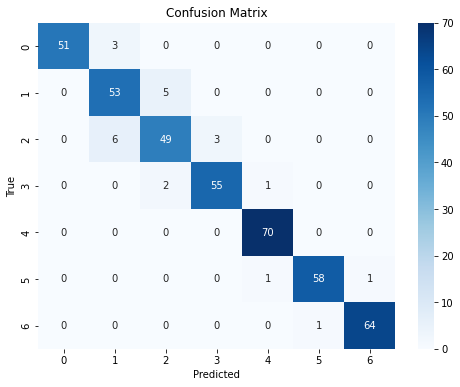

In [58]:
cm = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

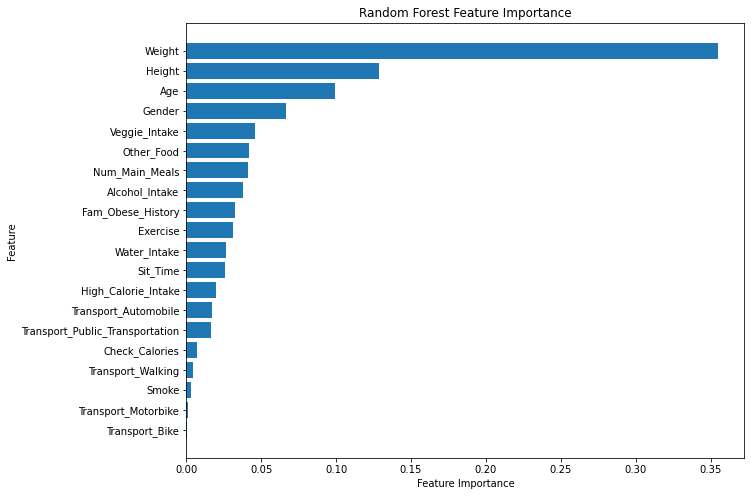

In [59]:
# Get feature importances
feature_importances = rf_model.feature_importances_

# Get feature names
feature_names = np.array(list(X.columns))

# Sort indices by importance
indices = np.argsort(feature_importances)

# Plotting
plt.figure(figsize=(10, 8))
plt.barh(range(len(indices)), feature_importances[indices], align='center')
plt.yticks(range(len(indices)), feature_names[indices])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importance')
plt.show()

# Hyperparameter Tuning for Random Forest

In [60]:
# Create a Random Forest model
rf = RandomForestClassifier(random_state=42)

# Define hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(rf, param_grid, cv=5)
grid_search.fit(X_train_scaled_df, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

# Train the model using the best hyperparameters
rf_best = RandomForestClassifier(**best_params)
rf_best.fit(X_train_scaled_df, y_train)

# Get the y_pred values
y_pred_tuned = rf_best.predict(X_test_scaled_df)

# Get the accuracy score on the test set
accuracy = accuracy_score(y_test, y_pred_tuned)
print(f'Accuracy using best model: {accuracy:.5f}')

Best hyperparameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'n_estimators': 100}
Accuracy using best model: 0.93381


In [61]:
report = classification_report(y_test, y_pred_tuned)
print('Classification Report:\n', report)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.94      0.97        54
           1       0.82      0.88      0.85        58
           2       0.85      0.86      0.85        58
           3       0.96      0.95      0.96        58
           4       0.97      0.94      0.96        70
           5       0.95      0.97      0.96        60
           6       0.98      0.98      0.98        65

    accuracy                           0.93       423
   macro avg       0.93      0.93      0.93       423
weighted avg       0.94      0.93      0.93       423



### Confusion Matrix

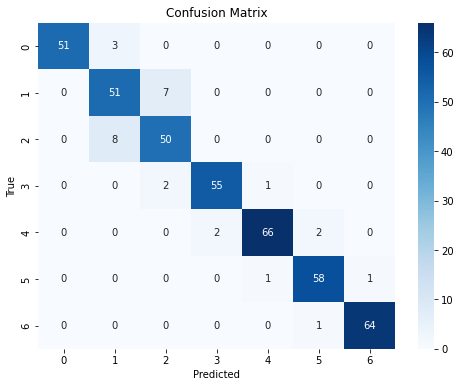

In [62]:
cm = confusion_matrix(y_test, y_pred_tuned)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### AUC-ROC Curve

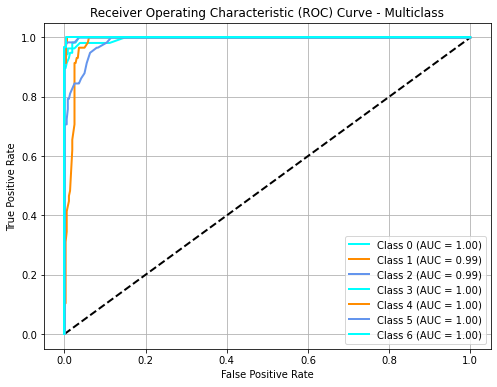

In [63]:
# Calculate AUC for each class
n_classes = len(np.unique(y))
y_test_bin = label_binarize(y_test, classes=np.unique(y))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], rf_model.predict_proba(X_test_scaled_df)[:, i])
    roc_auc[i] = roc_auc_score(y_test_bin[:, i], rf_model.predict_proba(X_test_scaled_df)[:, i])

# Plot ROC curves
plt.figure(figsize=(8, 6))

# Plotting the diagonal
plt.plot([0, 1], [0, 1], 'k--', lw=2)

# Plotting each class
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Multiclass')
plt.legend(loc='lower right')
plt.grid()
plt.show()

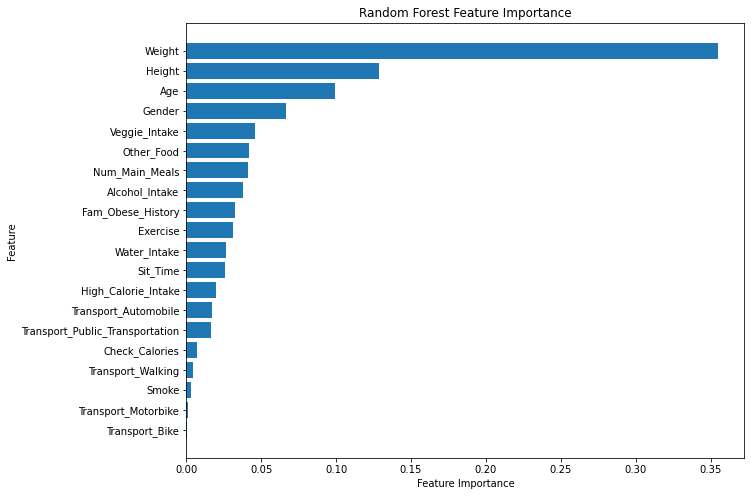

In [64]:
# Get feature importances
feature_importances = rf_model.feature_importances_

# Get feature names
feature_names = np.array(list(X.columns))

# Sort indices by importance
indices = np.argsort(feature_importances)

# Plotting
plt.figure(figsize=(10, 8))
plt.barh(range(len(indices)), feature_importances[indices], align='center')
plt.yticks(range(len(indices)), feature_names[indices])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importance')
plt.show()

# Clustering

In [65]:
kmeans = KMeans(n_clusters = 7, init = "k-means++")

In [66]:
def plot_clusters(dataset, feature_one, feature_two, labels, title = None):
    sns.scatterplot(data = dataset, x = feature_one, y = feature_two, hue = labels, palette = "coolwarm")
    if title is not None:
        plt.grid()
        plt.title(title)
    plt.show()

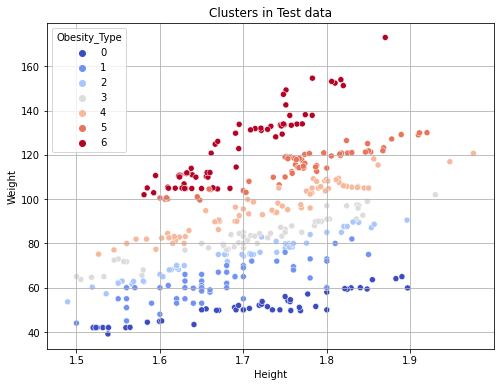

In [67]:
plt.figure(figsize=(8, 6))
plot_clusters(X_test, "Height", "Weight", y_test, "Clusters in Test data")

In [68]:
predicted_labels = kmeans.fit_predict(X_test)

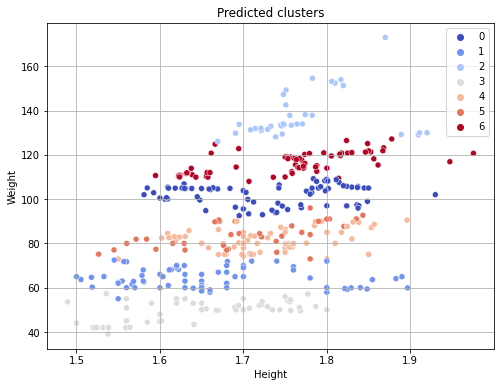

In [69]:
plt.figure(figsize=(8, 6))
plot_clusters(X_test, "Height", "Weight", predicted_labels, "Predicted clusters")

# XGBoost

In [70]:
# Initialize the model
xgb_classifier = xgb.XGBClassifier()
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Fit the model on the scaled training data
model.fit(X_train_scaled, y_train)

# Predictions on the scaled test data
y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_pred, y_test)
print(f'Accuracy: {accuracy:.5f}')

Accuracy: 0.96454


In [71]:
print('classification_report : \n')
print(classification_report(y_test, y_pred))

classification_report : 

              precision    recall  f1-score   support

           0       0.98      0.94      0.96        54
           1       0.90      0.97      0.93        58
           2       0.96      0.91      0.94        58
           3       0.97      0.97      0.97        58
           4       0.96      1.00      0.98        70
           5       0.98      0.97      0.97        60
           6       1.00      0.98      0.99        65

    accuracy                           0.96       423
   macro avg       0.97      0.96      0.96       423
weighted avg       0.97      0.96      0.96       423



### Confusion Matrix

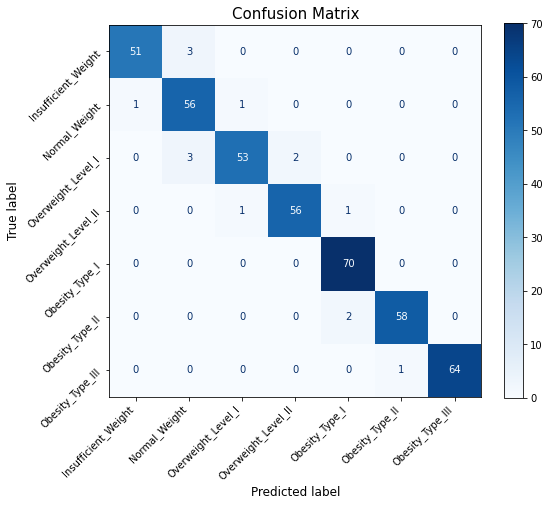

In [72]:
cm_xgboost = confusion_matrix(y_test, y_pred)

# Create the ConfusionMatrixDisplay instance
disp = ConfusionMatrixDisplay(confusion_matrix=cm_xgboost, display_labels=['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III'])

# Use the instance to plot the confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(ax=ax, cmap=plt.cm.Blues, values_format='.0f')

plt.tight_layout()
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=45, ha='right')
plt.xlabel('Predicted label', fontsize=12)
plt.ylabel('True label', fontsize=12)
plt.title('Confusion Matrix', fontsize=15)
plt.show()

### AUC-ROC Curve

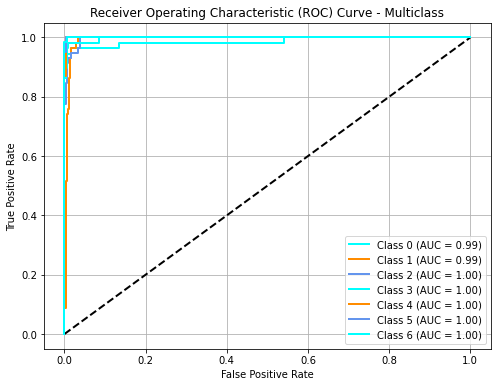

In [73]:
# Calculate AUC for each class
n_classes = len(np.unique(y))
y_test_bin = label_binarize(y_test, classes=np.unique(y))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], model.predict_proba(X_test_scaled_df)[:, i])
    roc_auc[i] = roc_auc_score(y_test_bin[:, i], model.predict_proba(X_test_scaled_df)[:, i])

# Plot ROC curves
plt.figure(figsize=(8, 6))

# Plotting the diagonal
plt.plot([0, 1], [0, 1], 'k--', lw=2)

# Plotting each class
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Multiclass')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

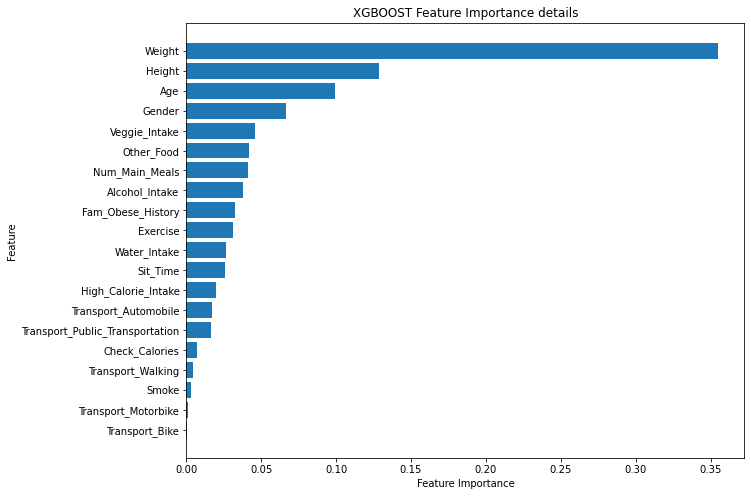

In [74]:
feature_names = np.array(list(X_train.columns))
feature_importance = model.feature_importances_
importance_dict = dict(zip(feature_names, feature_importances))

# Sort indices by importance
indices = np.argsort(feature_importances)

# Plotting
plt.figure(figsize=(10, 8))
plt.barh(range(len(indices)), feature_importances[indices], align='center')
plt.yticks(range(len(indices)), feature_names[indices])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('XGBOOST Feature Importance details')
plt.show()

# Hyperparameter Tuning for XGBoost

In [75]:
# Define hyperparameters to tune
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
}

# Create a xgboost model
xgb_classifier = xgb.XGBClassifier()
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=5)

# Use GridSearchCV to find the best hyperparameters
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

Best hyperparameters: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 200}


In [76]:
# Train the model with best params
xgb_classifier = xgb.XGBClassifier(**best_params)
xgb_classifier.fit(X_train_scaled, y_train)

y_pred_gd = xgb_classifier.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred_gd)
print(f'Accuracy: {accuracy:.5f}')

Accuracy: 0.94799


In [77]:
print('classification_report : \n')
print(classification_report(y_test, y_pred_gd))

classification_report : 

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        54
           1       0.86      0.88      0.87        58
           2       0.91      0.91      0.91        58
           3       0.98      0.95      0.96        58
           4       0.96      1.00      0.98        70
           5       0.98      0.97      0.97        60
           6       1.00      0.98      0.99        65

    accuracy                           0.95       423
   macro avg       0.95      0.95      0.95       423
weighted avg       0.95      0.95      0.95       423



### Confusion Matrix

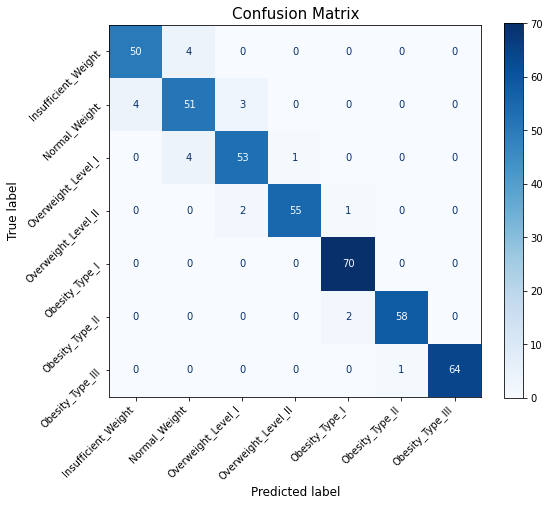

In [78]:
cm_xgboost = confusion_matrix(y_test, y_pred_gd)

# Create the ConfusionMatrixDisplay instance
disp = ConfusionMatrixDisplay(confusion_matrix=cm_xgboost, display_labels=['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III'])

# Use the instance to plot the confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(ax=ax, cmap=plt.cm.Blues, values_format='.0f')

plt.tight_layout()
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=45, ha='right')
plt.xlabel('Predicted label', fontsize=12)
plt.ylabel('True label', fontsize=12)
plt.title('Confusion Matrix', fontsize=15)
plt.show()

### AUC-ROC Curve

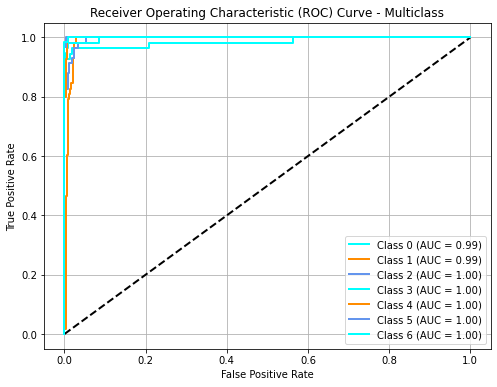

In [79]:
# Calculate AUC for each class
n_classes = len(np.unique(y))
y_test_bin_gd = label_binarize(y_test, classes=np.unique(y))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin_gd[:, i], xgb_classifier.predict_proba(X_test_scaled_df)[:, i])
    roc_auc[i] = roc_auc_score(y_test_bin_gd[:, i], xgb_classifier.predict_proba(X_test_scaled_df)[:, i])

# Plot ROC curves
plt.figure(figsize=(8, 6))

# Plotting the diagonal
plt.plot([0, 1], [0, 1], 'k--', lw=2)

# Plotting each class
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Multiclass')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

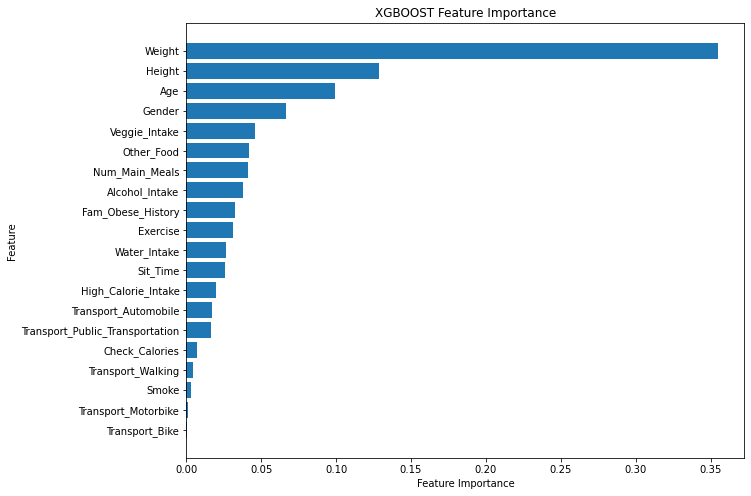

In [80]:
feature_names = np.array(list(X_train.columns))
feature_importance = xgb_classifier.feature_importances_
importance_dict = dict(zip(feature_names, feature_importances))

# Sort indices by importance
indices = np.argsort(feature_importances)

# Plotting
plt.figure(figsize=(10, 8))
plt.barh(range(len(indices)), feature_importances[indices], align='center')
plt.yticks(range(len(indices)), feature_names[indices])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('XGBOOST Feature Importance')
plt.show()

# XGBoost with feature engineering

In [81]:
df_model_bmi = df_model.copy()

In [82]:
df_model_bmi.head()

,Gender,Age,Height,Weight,Fam_Obese_History,High_Calorie_Intake,Veggie_Intake,Num_Main_Meals,Other_Food,Smoke,...,Check_Calories,Exercise,Sit_Time,Alcohol_Intake,Obesity_Type,Transport_Automobile,Transport_Bike,Transport_Motorbike,Transport_Public_Transportation,Transport_Walking
0,0,21,1.62,64.0,1,0,2,3,1,0,...,0,0,1,0,1,0,0,0,1,0
1,0,21,1.52,56.0,1,0,3,3,1,1,...,1,3,0,1,1,0,0,0,1,0
2,1,23,1.80,77.0,1,0,2,3,1,0,...,0,2,1,2,1,0,0,0,1,0
3,1,27,1.80,87.0,0,0,3,3,1,0,...,0,2,0,2,2,0,0,0,0,1
4,1,22,1.78,89.8,0,0,2,1,1,0,...,0,0,0,1,3,0,0,0,1,0


In [83]:
df_model_bmi['BMI'] = df_model_bmi['Weight'] / (df_model_bmi['Height'] ** 2)

In [84]:
df_model_bmi.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'Fam_Obese_History',
       'High_Calorie_Intake', 'Veggie_Intake', 'Num_Main_Meals', 'Other_Food',
       'Smoke', 'Water_Intake', 'Check_Calories', 'Exercise', 'Sit_Time',
       'Alcohol_Intake', 'Obesity_Type', 'Transport_Automobile',
       'Transport_Bike', 'Transport_Motorbike',
       'Transport_Public_Transportation', 'Transport_Walking', 'BMI'],
      dtype='object')

In [85]:
X_bmi = df_model_bmi.drop(['Obesity_Type', 'Height', 'Weight'], axis=1)
y_bmi = df_model_bmi['Obesity_Type']

X_train_bmi, X_test_bmi, y_train_bmi, y_test_bmi = train_test_split(X_bmi, y_bmi, test_size=0.2, random_state=42, stratify=y_bmi)

In [86]:
# Initialize the StandardScaler
scaler = StandardScaler()
X_train_scaled_bmi = scaler.fit_transform(X_train_bmi)
X_test_scaled_bmi = scaler.transform(X_test_bmi)

# # Convert the scaled array back to a DataFrame
X_train_scaled_df_bmi = pd.DataFrame(X_train_scaled_bmi, columns=X_train_bmi.columns)
X_test_scaled_df_bmi = pd.DataFrame(X_test_scaled_bmi, columns=X_test_bmi.columns)

In [87]:
xgb_classifier_bmi = xgb.XGBClassifier()
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
}

grid_search = GridSearchCV(estimator=xgb_classifier_bmi, param_grid=param_grid, cv=5)
grid_search.fit(X_train_scaled_bmi, y_train_bmi)

best_params_bmi = grid_search.best_params_
print('best parameters :',best_params_bmi)

best parameters : {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100}


In [88]:
xgb_classifier_bmi = xgb.XGBClassifier(**best_params_bmi)
xgb_classifier_bmi.fit(X_train_scaled_bmi, y_train_bmi)

y_pred_bmi = xgb_classifier_bmi.predict(X_test_scaled_bmi)

accuracy_bmi = accuracy_score(y_test_bmi, y_pred_bmi)

print(f'Accuracy: {accuracy_bmi:.5f}')

Accuracy: 0.97400


In [89]:
print('classification_report : \n')
print(classification_report(y_test_bmi, y_pred_bmi))

classification_report : 

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        54
           1       1.00      0.91      0.95        58
           2       0.90      0.98      0.94        58
           3       0.98      0.97      0.97        58
           4       0.99      1.00      0.99        70
           5       0.98      0.97      0.97        60
           6       0.98      0.98      0.98        65

    accuracy                           0.97       423
   macro avg       0.97      0.97      0.97       423
weighted avg       0.98      0.97      0.97       423



### Confusion Matrix

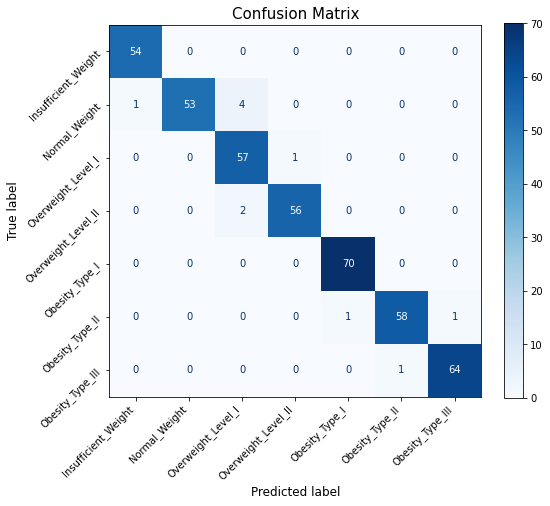

In [90]:
cm = confusion_matrix(y_test_bmi, y_pred_bmi)

# Create the ConfusionMatrixDisplay instance
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III'])

# Use the instance to plot the confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(ax=ax, cmap=plt.cm.Blues, values_format='.0f')

plt.tight_layout()
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=45, ha='right')
plt.xlabel('Predicted label', fontsize=12)
plt.ylabel('True label', fontsize=12)
plt.title('Confusion Matrix', fontsize=15)
plt.show()

### AUC-ROC Curve

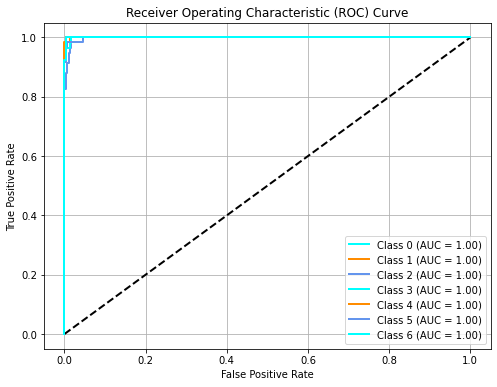

In [91]:
# Calculate AUC for each class
n_classes = len(np.unique(y))
y_test_bin_bmi = label_binarize(y_test_bmi, classes=np.unique(y))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin_bmi[:, i], xgb_classifier_bmi.predict_proba(X_test_scaled_df_bmi)[:, i])
    roc_auc[i] = roc_auc_score(y_test_bin_bmi[:, i], xgb_classifier_bmi.predict_proba(X_test_scaled_df_bmi)[:, i])

# Plot ROC curves
plt.figure(figsize=(8, 6))

# Plotting the diagonal
plt.plot([0, 1], [0, 1], 'k--', lw=2)

# Plotting each class
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

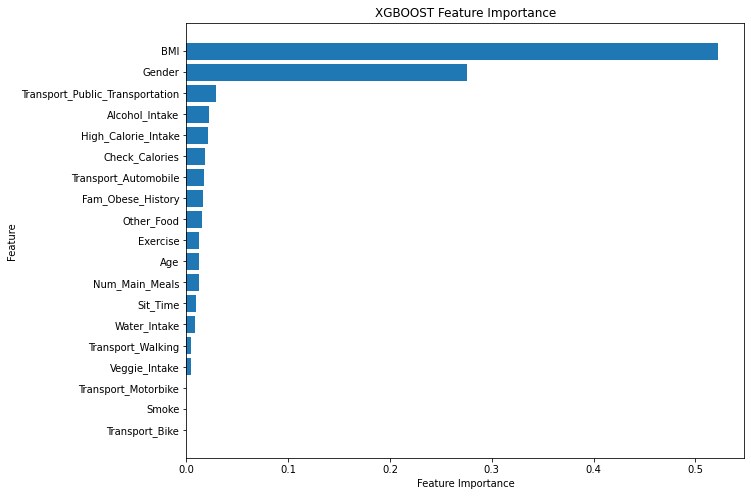

In [92]:
feature_importances = xgb_classifier_bmi.feature_importances_

# Extract the feature names
feature_names = np.array(X_train_scaled_df_bmi.columns)

# Sort indices by importance
indices = np.argsort(feature_importances)

# Plotting
plt.figure(figsize=(10, 8))
plt.barh(range(len(indices)), feature_importances[indices], align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('XGBOOST Feature Importance')
plt.show()

# Logistic Regression

In [93]:
# Initialize the model
lr = LogisticRegression(multi_class='ovr', solver='liblinear')

# Fit the model on the scaled training data
lr = lr.fit(X_train_scaled_df, y_train)

# Predictions on the scaled test data
y_pred_lr = lr.predict(X_test_scaled_df)

accuracy = accuracy_score(y_test, y_pred_lr)
print(f'Accuracy: {accuracy:.5f}')

Accuracy: 0.74704


In [94]:
report = classification_report(y_test, y_pred_lr)
print('Classification Report: \n', report)

Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.93      0.90        54
           1       0.71      0.55      0.62        58
           2       0.62      0.64      0.63        58
           3       0.62      0.59      0.60        58
           4       0.62      0.57      0.59        70
           5       0.79      0.98      0.87        60
           6       0.97      0.98      0.98        65

    accuracy                           0.75       423
   macro avg       0.74      0.75      0.74       423
weighted avg       0.74      0.75      0.74       423



### Confusion Matrix

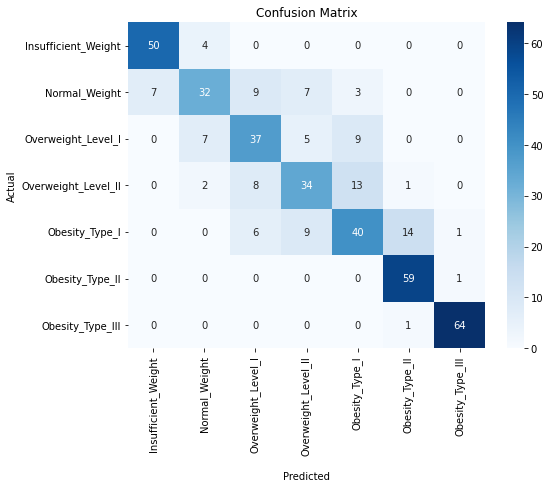

In [95]:
cm = confusion_matrix(y_test, y_pred_lr)

classes = ('Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 
           'Obesity_Type_II', 'Obesity_Type_III')

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix')
plt.xlabel('\nPredicted')
plt.ylabel('Actual')
plt.show()

### AUC-ROC Curve

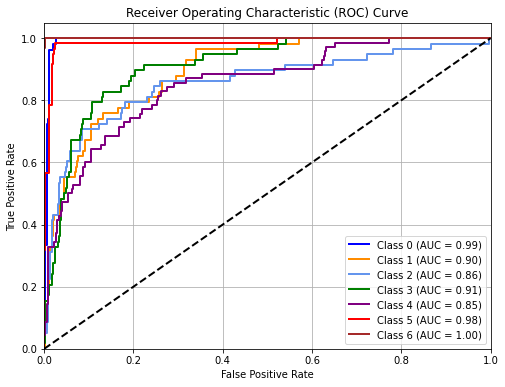

In [96]:
model = OneVsRestClassifier(lr)
model.fit(X_train_scaled_df, y_train)

y_score = model.predict_proba(X_test_scaled_df)
y_test_bin = label_binarize(y_test, classes=np.unique(y))

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(np.unique(y))):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure(figsize=(8, 6))

colors = cycle(['blue', 'darkorange', 'cornflowerblue', 'green', 'purple', 'red', 'brown'])
for i, color in zip(range(len(np.unique(y))), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

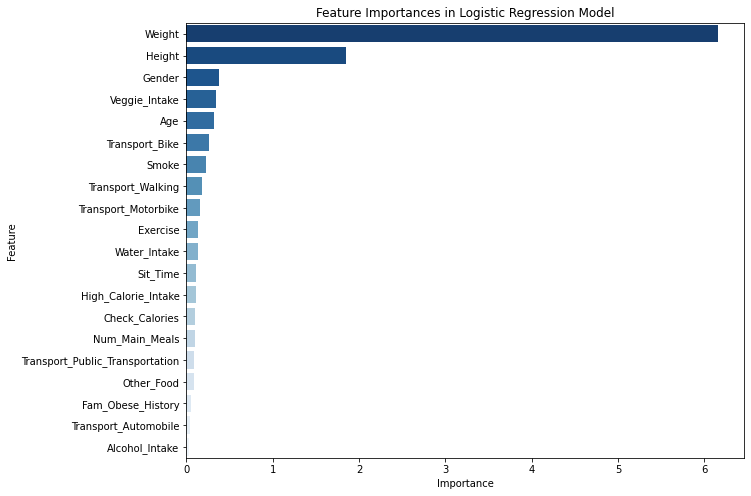

In [97]:
feature_importances = np.abs(lr.coef_[0])

feature_names = X_train_scaled_df.columns
feature_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

feature_df = feature_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_df, palette='Blues_r')
plt.title('Feature Importances in Logistic Regression Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Hyperparameter Tuning for Logistic Regression

In [98]:
# Create a model 
lr_tuning = LogisticRegression(multi_class='ovr', random_state=42)

# Define hyperparameters to tune
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(lr_tuning, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled_df, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(multi_class='ovr', random_state=42),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [99]:
# Get the best hyperparameters
best_params_lr = grid_search.best_params_
print("Best Hyperparameters:", best_params_lr)

# Train the model using the best hyperparameters
lr_tuned = LogisticRegression(**best_params_lr)
lr_tuned.fit(X_train_scaled_df, y_train)

# Get the y_pred values
y_pred_lr_tuned = lr_tuned.predict(X_test_scaled_df)

# Get the accuracy score on the test set
accuracy = accuracy_score(y_test, y_pred_lr_tuned)
print(f'Accuracy using best model: {accuracy:.5f}')

Best Hyperparameters: {'C': 1000, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy using best model: 0.78014


In [100]:
report = classification_report(y_test, y_pred_lr_tuned)
print('Classification Report: \n', report)

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        54
           1       0.81      0.66      0.72        58
           2       0.58      0.64      0.61        58
           3       0.58      0.59      0.58        58
           4       0.64      0.63      0.63        70
           5       0.92      0.98      0.95        60
           6       0.98      0.98      0.98        65

    accuracy                           0.78       423
   macro avg       0.78      0.78      0.78       423
weighted avg       0.78      0.78      0.78       423



### Confusion Matrix

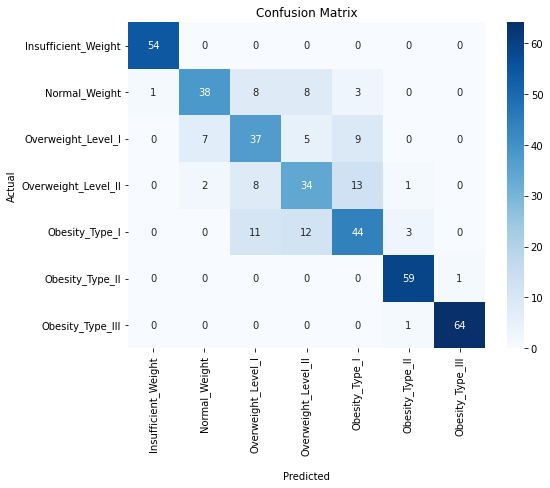

In [101]:
cm = confusion_matrix(y_test, y_pred_lr_tuned)

classes = ('Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 
           'Obesity_Type_II', 'Obesity_Type_III')

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix')
plt.xlabel('\nPredicted')
plt.ylabel('Actual')
plt.show()

### AUC-ROC Curve

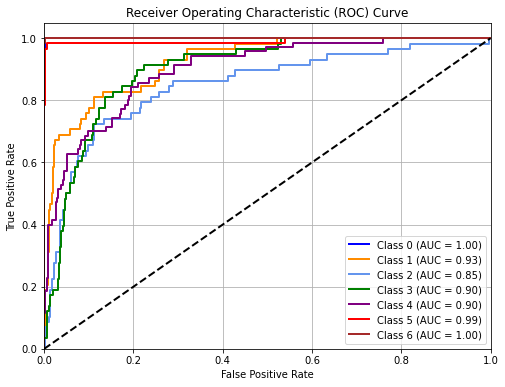

In [102]:
model = OneVsRestClassifier(lr_tuned)
model.fit(X_train_scaled_df, y_train)

y_score = model.predict_proba(X_test_scaled_df)
y_test_bin = label_binarize(y_test, classes=np.unique(y))

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(np.unique(y))):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure(figsize=(8, 6))

colors = cycle(['blue', 'darkorange', 'cornflowerblue', 'green', 'purple', 'red', 'brown'])
for i, color in zip(range(len(np.unique(y))), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

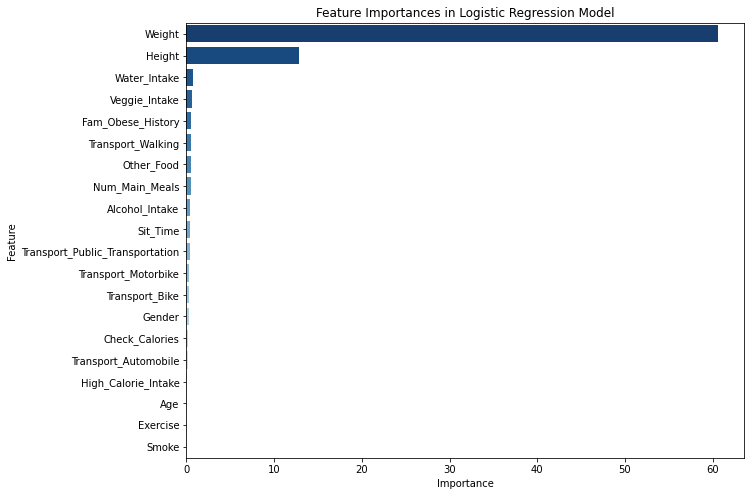

In [103]:
feature_importances = np.abs(lr_tuned.coef_[0])

feature_names = X_train_scaled_df.columns
feature_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

feature_df = feature_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_df, palette='Blues_r')
plt.title('Feature Importances in Logistic Regression Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()